## Customer Segmentation

In this project, I will be performing an unsupervised clustering of data on the customer's record from a groceries firm's database. 

Customer segmentation is the practice of seperating customers into groups that reflect similairites among cutomers in each cluster. 

I will divide customers into segments to optimize the significance of each customer to the business. To modify products according to distint needs and behaviours of the customers.

It also helps the business to cater to the concerns of different types of customers.

**TABLE OF CONTENTS**

1. Importing Libraries
2. Loading Data
3. Data Cleaning
4. Data Preprocessing
5. Dimensionality Reduction
6. Clustering
7. Evaluating Models
8. Profiling
9. Conclusion

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import datetime

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

# preprocessing and model
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap
from sklearn import metrics

import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

## Loading Data

In [2]:
data = pd.read_csv(r"C:/Users/user/Documents/datasets/marketing_campaign.csv", sep="\t")
pd.set_option('display.max_columns', None) # view the full columns


data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [25]:
data.shape # check the dimension of your data

(2216, 30)

## Attributes Detail

**People**
+ ID: Customer's unique identifier
+ Year_Birth: Customer's birth year
+ Education: Customer's education level
+ Marital_Status: Customer's marital status
+ Income: Customer's yearly household income
+ Kidhome: Number of children in customer's household
+ Teenhome: Number of teenagers in customer's household
+ Dt_Customer: Date of customer's enrollment with the company
+ Recency: Number of days since customer's last purchase
+ Complain: 1 if the customer complained in the last 2 years, 0 otherwise

**Products**
+ MntWines: Amount spent on wine in last 2 years
+ MntFruits: Amount spent on fruits in last 2 years
+ MntMeatProducts: Amount spent on meat in last 2 years
+ MntFishProducts: Amount spent on fish in last 2 years
+ MntSweetProducts: Amount spent on sweets in last 2 years
+ MntGoldProds: Amount spent on gold in last 2 years

**Promotion**
+ NumDealsPurchases: Number of purchases made with a discount
+ AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
+ AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
+ AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
+ AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
+ AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
+ Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

**Place**
+ NumWebPurchases: Number of purchases made through the company’s website
+ NumCatalogPurchases: Number of purchases made using a catalogue
+ NumStorePurchases: Number of purchases made directly in stores
+ NumWebVisitsMonth: Number of visits to company’s website in the last month

**Target**
Need to perform clustering to summarize customer segments.

## Data Cleaning

**In this section**
+ Data Cleaning
+ Feature Engineering

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

+ There are missing values in income
+ Dt_Customer that indicates the data a customer joined the database is not parsed as DateTime
+ There are some categorical features in our dataframe; as there are some features in dtype: object. So we will need to encode them into numeric forms later

First of all, for the missing values, I am simply going to drop the rows that have missing income values.

In [6]:
# drop missing values
data = data.dropna()
len(data)

2216

In the next step, I am going to create a feature out of "Dt_Customer" that indicates the number of days a customer is registered in the firm's database. However.

In order to keep it simple, I am taking this value relative to the most recent customer in the record.

Thus to get the values I must check the newest and oldest recorded dates

In [7]:
data['Dt_Customer'] = pd.to_datetime(data["Dt_Customer"], format="mixed")
dates = []
for i in data["Dt_Customer"]:
    i = i.date()
    dates.append(i)
# Dates of the newest and oldest recorded customer
print("The newest customer's enrolement date in the records:", max(dates))

print("The oldest customer's enrolment date in the records:", min(dates))

The newest customer's enrolement date in the records: 2014-12-06
The oldest customer's enrolment date in the records: 2012-01-08


Creating a feature "Customer_For" of the number of days the customers started to shop in the store relative to the last recorded date

In [8]:
days = []
d1 = max(dates) # taking it to be the newest customer
for i in dates:
    delta = d1 - i
    days.append(delta.days)
data["Customer_For"] = days
# data["Customer_For"] = pd.to_numeric(data["Customer_For"], errors="coerce")
data["Customer_For"].head()

0    971
1    125
2    472
3     65
4    321
Name: Customer_For, dtype: int64

Now we will be exploring the unique values in the categorical features to get a clear idea of the data.

In [9]:
print("Marital Status unique categories: ", data["Marital_Status"].value_counts(), "\n")
print("Education unique categoires: ", data["Education"].value_counts())

Marital Status unique categories:  Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64 

Education unique categoires:  Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64


In the next bit I will be performing the following steps to engineer some new features:

+ Extract the "Age" of a customer by the "Year_Birth" indicating the birth year of the respective person.
+ Create another feature "Spent" indicating the total amount spent by the customer in various categories over the span of two years.
+ Create another feature "Living_With" out of "Marital_Status" to extract the living situation of couples.
+ "Children" - to indicate total children in a household
+ "Family_Size"
+ "Is_Parent" - to indicate parenthood status
+ Lastly, I will create three categories in the "Education" by simplifying its value counts
+ Dropping some redundant features

In [10]:
data["Age"] = 2015-data["Year_Birth"]

# Total spendings on various items
data["Spent"] = data["MntWines"] + data["MntFruits"] + data["MntMeatProducts"] + data["MntFishProducts"] + data["MntSweetProducts"] + data["MntGoldProds"]

# Deriving living situation by marital status "Alonw"
data["Living_With"] = data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone"})

# feature indicating total children living in the household
data["Children"] = data["Kidhome"]+data["Teenhome"]

# Feature for total members in the household
data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner": 2}) + data["Children"]

# feature partaining parenthood
data["Is_Parent"] = np.where(data.Children > 0, 1, 0)

# Segmenting education levels in three groups
data["Education"] = data["Education"].replace({"Basic":"Undergraduate", "2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

# For clarity
data=data.rename(columns={"MntWines":"Wines", "MntFruits":"Fruits", "MntMeatProducts":"Meat", "MntFishPrdoducts":"Fish", "MntSweetProducts":"Sweets", "MntGoldProds":"Gold"})

# dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]

data =data.drop(to_drop, axis=1)

In [11]:
data["Living_With"].value_counts()

Living_With
Partner    1430
Alone       786
Name: count, dtype: int64

In [24]:
max(data['Customer_For'])

1063

In [12]:
data.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,MntFishProducts,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,0.150271,512.006318,46.179603,607.075361,0.947202,2.592509,0.714350
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.357417,232.469034,11.985554,602.900476,0.749062,0.905722,0.451825
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,5.000000,0.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,340.000000,38.000000,69.000000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,513.000000,45.000000,396.500000,1.000000,3.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,686.000000,56.000000,1048.000000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1063.000000,122.000000,2525.000000,3.000000,5.000000,1.000000


The above stats shows some discrepancies in mean income and Age and max Income and age

Do note that max-age is 128 years, As I calculated the age that would be today (i.e 2021) and the data is old.

I must take a look at the broader view of the data. I will plot some of the selected features.

Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 800x550 with 0 Axes>

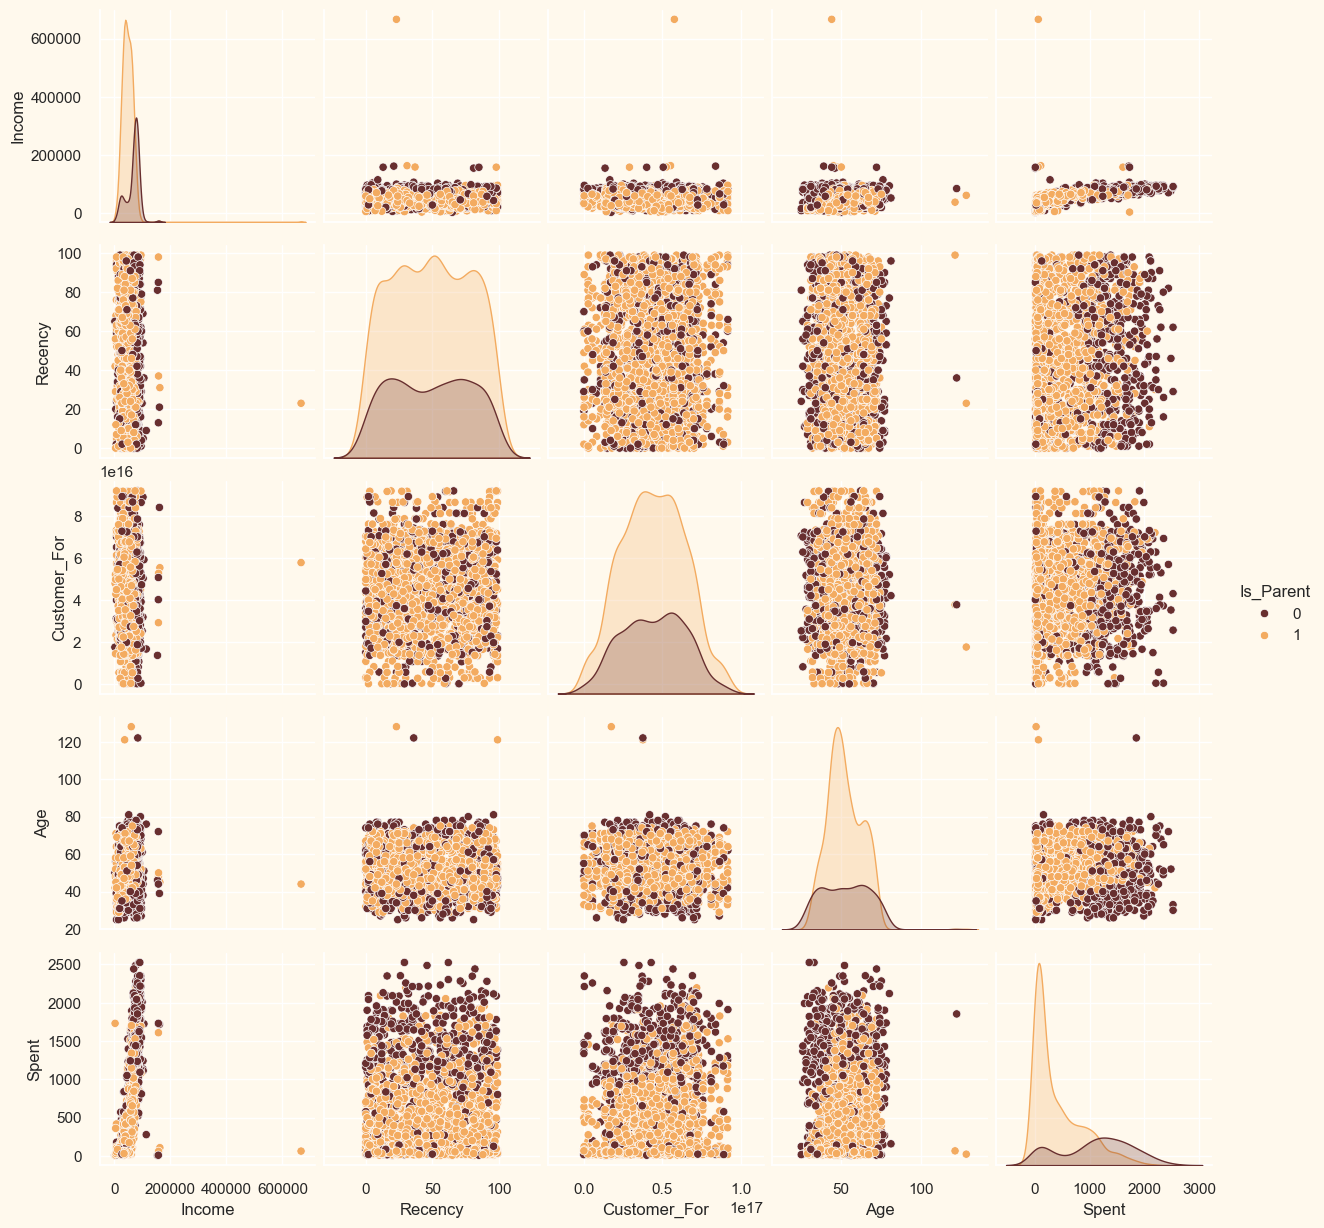

In [12]:
# To plot some selected features 
#Setting up colors prefrences
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
#Plotting following features
To_Plot = [ "Income", "Recency", "Customer_For", "Age", "Spent", "Is_Parent"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(data[To_Plot], hue= "Is_Parent",palette= (["#682F2F","#F3AB60"]))
#Taking hue 
plt.show()

Clearly, there are a few outliers in the income and Age features. I will be deleting the outliers in the data.

In [13]:
# drpping the outliers by setting a cap on Age and income
data = data[(data["Age"]<90)]
data = data[(data["Income"]<600000)]

print("Total number of data-points after removing outliers", len(data))

Total number of data-points after removing outliers 2212


Next, let us look at the correlation amongst the features. (Excluding the categorical attributes at this point)

<Axes: >

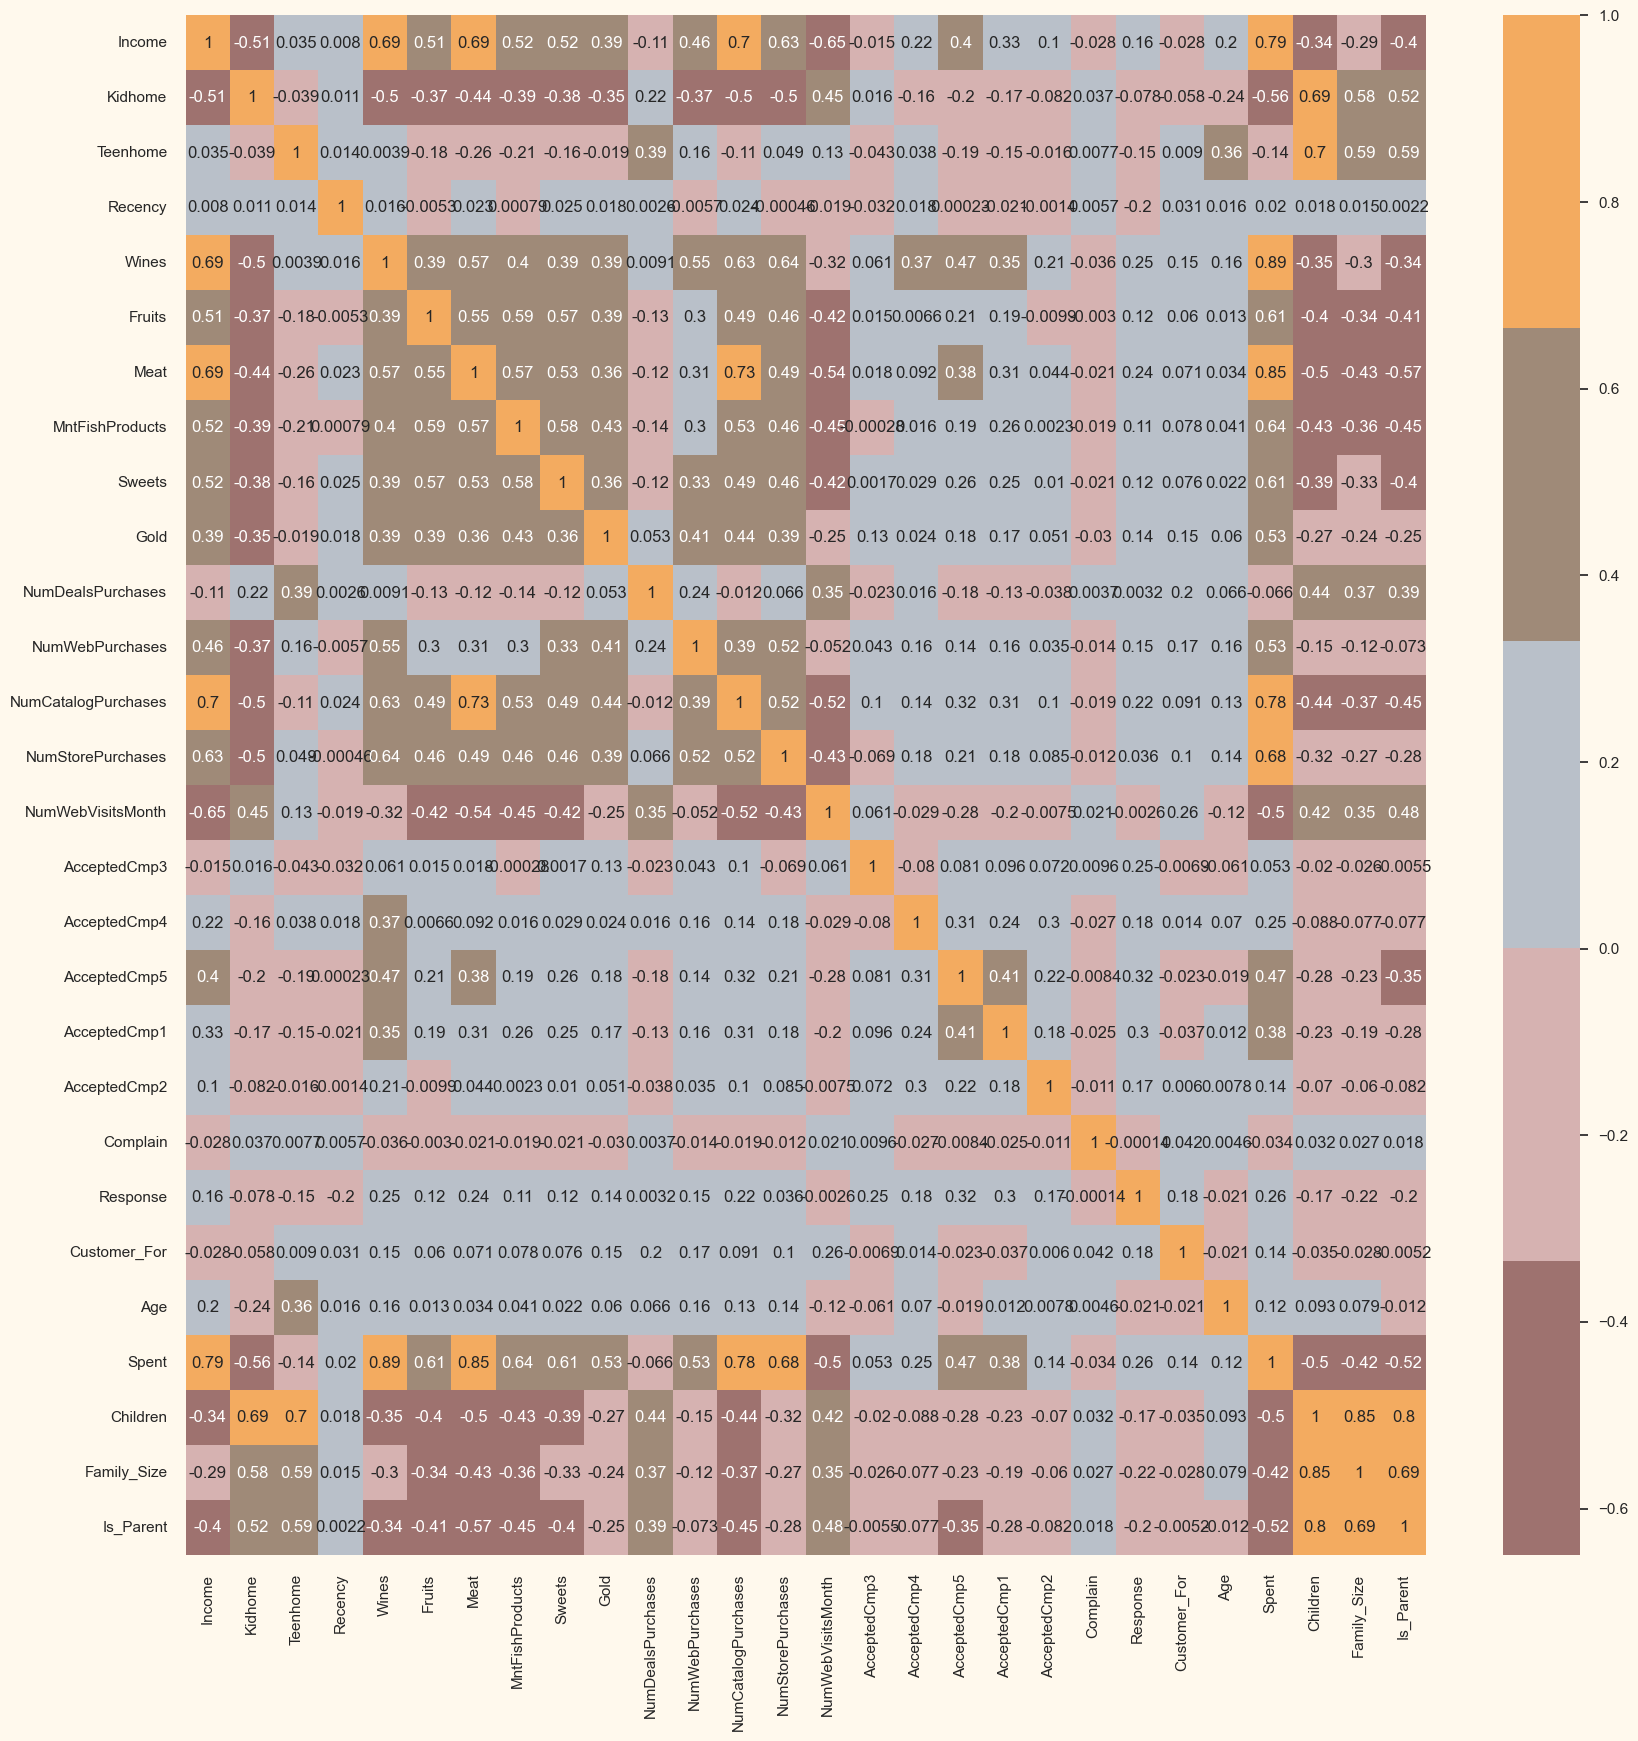

In [14]:
# correlation matrix
corrmat = data.corr(numeric_only=True)
plt.figure(figsize=(20,20))
sns.heatmap(corrmat,annot=True,cmap=cmap,center=0)

The data is quite clean and the new features have been included. I will proceed to the next step. Preprocessing the data

## Data Preprocessing

In this section, i will be preprocessing the data to perform clustering operations.

**The following steps are applied to preprocess the data:**
+ Label encoding the categorical features
+ Scaling the features using the standard scaler
+ Creating a subset dataframe fro dimensionality reduction

In [15]:
# get the list categorical variables
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education', 'Living_With']


In [16]:
# Label Encoding the object dtypes.
LE=LabelEncoder()
for i in object_cols:
    data[i]=data[[i]].apply(LE.fit_transform)
    
print("All features are now numerical")

All features are now numerical


In [17]:
# Creatingn a copy of data
ds = data.copy()
# creating a subset of dataframe by dropping the features on deals accepted and promotions

cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)
# scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns=ds.columns)
print("All features are now scaled")

All features are now scaled


In [18]:
# Scaled data to be used for reducing the dimentionality
scaled_ds.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,MntFishProducts,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,-0.893586,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,0.852576,0.351030,1.426865,2.503607,-0.555814,0.692181,1.973583,1.018352,1.676245,-1.349603,-1.264598,-1.758359,-1.581139
1,-0.893586,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,-0.733642,-0.168701,-1.126420,-0.571340,-1.171160,-0.132545,-1.665144,1.274785,-0.963297,-1.349603,1.404572,0.449070,0.632456
2,-0.893586,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,-0.037254,-0.688432,1.426865,-0.229679,1.290224,-0.544908,-0.172664,0.334530,0.280110,0.740959,-1.264598,-0.654644,-1.581139
3,-0.893586,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,-0.752987,-0.168701,-0.761665,-0.913000,-0.555814,0.279818,-1.923210,-1.289547,-0.920135,0.740959,0.069987,0.449070,0.632456
4,0.571657,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,-0.559545,1.390492,0.332600,0.111982,0.059532,-0.132545,-0.822130,-1.033114,-0.307562,0.740959,0.069987,0.449070,0.632456


## Dimensionality Reduction

In this probloem, there are many factores on the basis of which the final classification will be done. These factors are basically attributes or features.

The higher the number of features, the harder it is to work with it. Many of these features are correlatted, and hence redundant.

This is why I will be performing dimensionality reduction on the selected features before putting them through a classifier.

Dimensionality reduction is the process of reducing the number of random variables under consideration, by obtaining a set of principle variables.

**Principla component analysis (PCA)** is a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss

**Steps in this section:**
+ Dimensionality reduction with PCA
+ Plotting the reduced dataframe

### Dimensionality Reduction with PCA
for this project, i will be reducing the dimensions to 3

In [19]:
# initializing PCA to reduce dimensions (features) to 3
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1", "col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2212.0,-1.284887e-17,2.878377,-5.969394,-2.538494,-0.780421,2.383290,7.444305
col2,2212.0,3.212219e-17,1.706839,-4.312196,-1.328316,-0.158123,1.242289,6.142721
col3,2212.0,7.307797e-17,1.221956,-3.530416,-0.829067,-0.022692,0.799895,6.611222


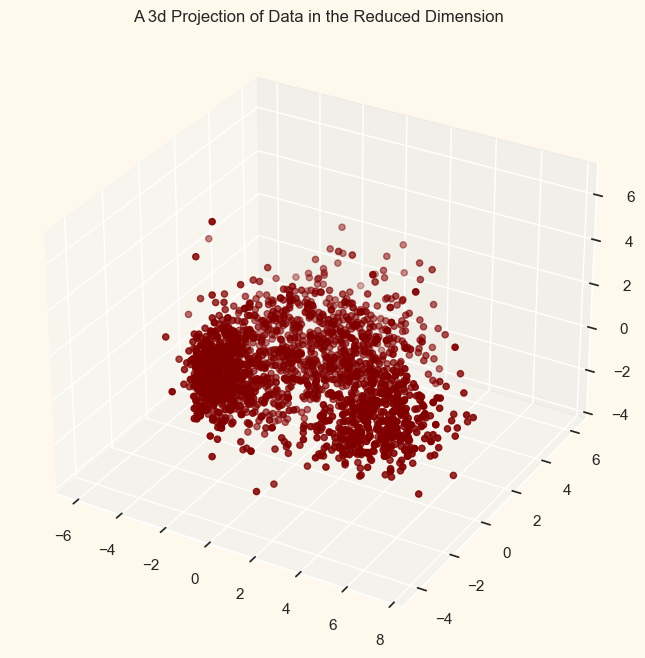

In [20]:
# A 3D projection of Data in the Reduced Dimension
x = PCA_ds["col1"]
y = PCA_ds["col2"]
z = PCA_ds["col3"]

# plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z, c="maroon", marker="o")
ax.set_title("A 3d Projection of Data in the Reduced Dimension")
plt.show()

## Clustering

I will be performing clustering via Agglomerative clustering. 

Agglomerative custering is aa hierarchical clustering method. It involves merging examples until the desired number of cluster is achieved.

**Steps involved in the Clustering**
+ Elbow Method to determine the number of clusters to be formed
+ Clustering via Agglomerative Clustering
+ Examining the cluster formed via scatter plot

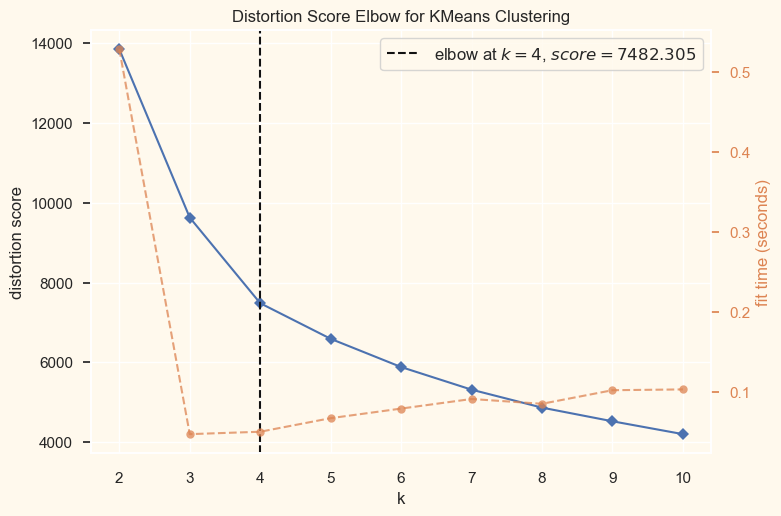

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [21]:
# Qucik examination of elbow method to find numbers of clusters to make.
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

The above cell indicates that four will be an optimal number of clusters for this data. Next, we will be fitting the agglomerative Clustering model to get the final clusters.

In [22]:
from sklearn.cluster import AgglomerativeClustering

AC = AgglomerativeClustering(n_clusters=4)

# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC

# adding the clusters features to the original dataframe
data["Clusters"]= yhat_AC

To examine the clusters formed let's have a look at the 3-D distribution of the clusters.

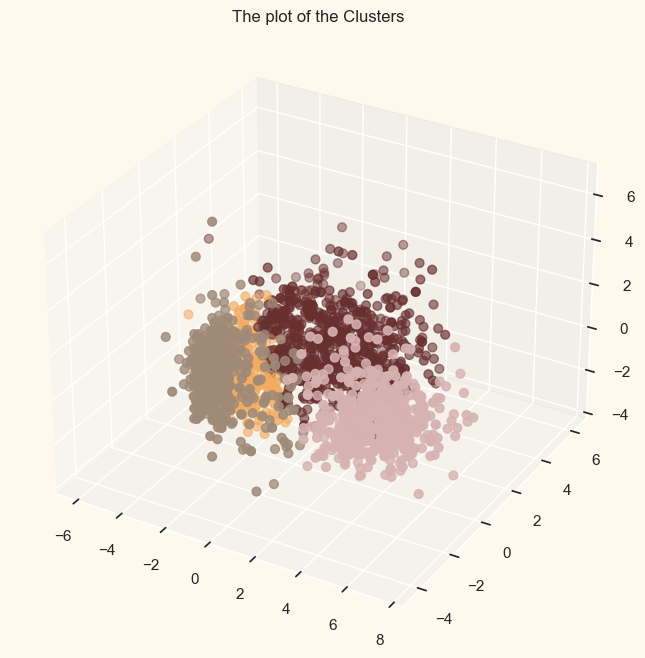

In [23]:
# plotting the clustters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label='bla')
ax.scatter(x,y,z,s=40,c=PCA_ds['Clusters'], marker='o',cmap=cmap)
ax.set_title("The plot of the Clusters")
plt.show()

## Evaluating Models

Since this is an unsupervised clustering, we do not have a tagged feature to evaluate or score our model. The purpose of this section is to study the patterns in the clusters formed and determine the nature of the clusters' patterns.

For that, we will be having a look at the data in light of clusters via exploratory data analysis and drwaing conclusions.

**Firstly, let us have a look at the grouo distribution of clustering**

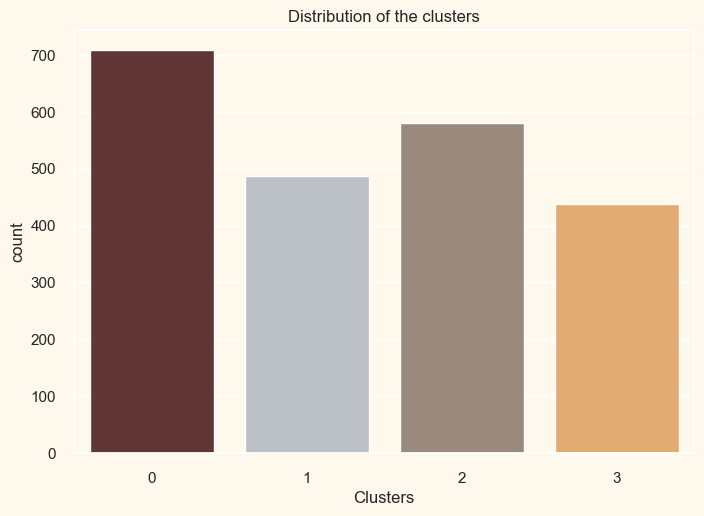

In [24]:
# plotting countplot of cluster
pal = ["#682F2F", "#B9C0C9", "#9f8a78", "#f3ab60"]
pl = sns.countplot(x=data["Clusters"], palette=pal)
pl.set_title("Distribution of the clusters")
plt.show()

The clusters seem to be fairly distributed

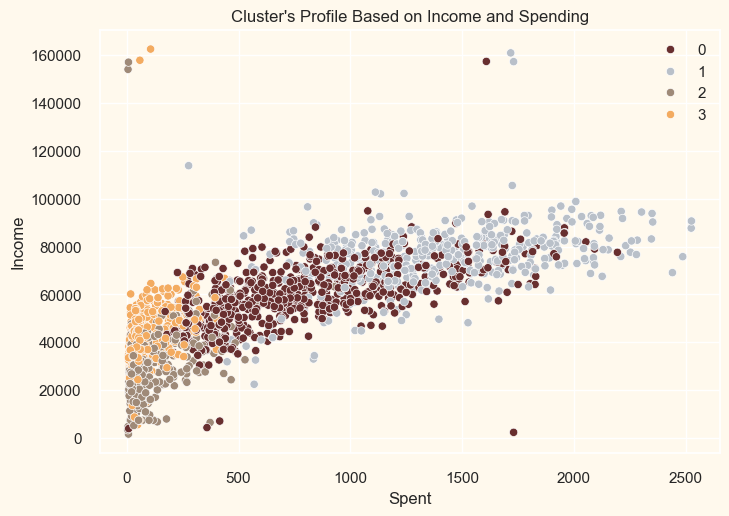

In [26]:
pl = sns.scatterplot(data = data, x=data["Spent"], y=data["Income"], hue=data['Clusters'], palette=pal)
pl.set_title("Cluster's Profile Based on Income and Spending")
plt.legend()
plt.show()

**Income vs spending plot shows the clusters pattern**
+ group 0: high spending and average income
+ group 1: high spending and high income
+ group 2: low spending and low income
+ group 3: high spending and low income

Next, I will be looking at the detailed distribution of clusters as per the various products in the data. Namely: Wines, Fruits, Meat, Fish, Sweets and Gold

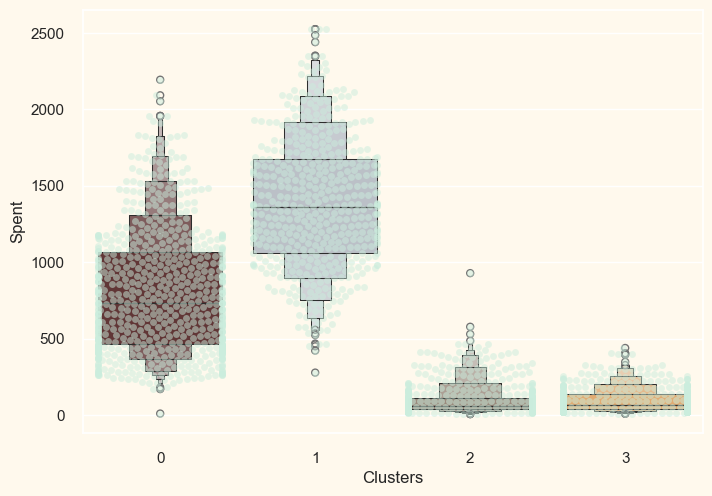

In [27]:
plt.figure()
pl=sns.swarmplot(x=data["Clusters"], y=data["Spent"], color="#CBEDDD", alpha=0.5)
pl=sns.boxenplot(x=data["Clusters"], y=data["Spent"], palette=pal)
plt.show()

From the plot above, it can be clearly seen that cluster 1 is our biggest set of customers closely followed by cluster 0. We can explore what each cluster is spending on for the targeted marketing strategies.

Let us next explore how did our campaigns do in the past.

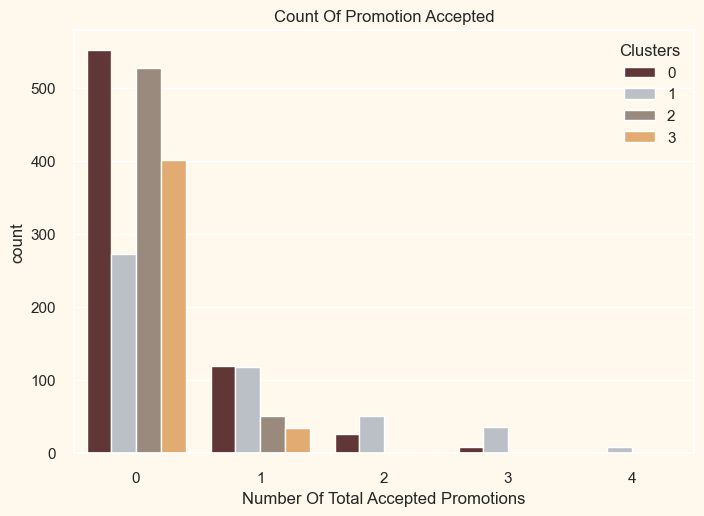

In [28]:
# Creating a feature to get a sum of accepted promotions
data["Total_Promos"] = data["AcceptedCmp1"]+ data["AcceptedCmp2"]+ data["AcceptedCmp3"]+ data["AcceptedCmp4"]+ data["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=data["Total_Promos"],hue=data["Clusters"], palette= pal)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

There has not been an overwhelming response to the campainge so far. Very few participants overall. Moreover, no one part take in all 5 of them. Perhaps better-tagerted ad well-planned campaigns are required to boost sales.

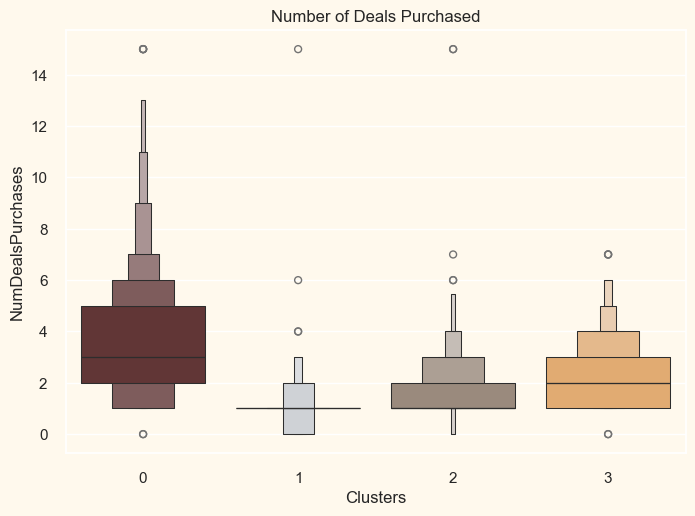

In [29]:
# plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=data["NumDealsPurchases"], x=data["Clusters"], palette=pal)
pl.set_title("Number of Deals Purchased")
plt.show()

Unlike the campaings, the deals offered did well. It has best outcome with cluster 0 nd cluster 3. However, our star customers cluster 1 are not much into deals. Nothing seems to attract cluster 2 overwhelmingly

## Profiling

Now that we have formed the clusters and looked at their purchasing habits. Let us see who all are there in these clusters. For that, we will be profiling the clusters formed and come to a conclusion about who is our star customer and who needs more attention from the retail store's marketing team.

To decide that I will be plotting some of the features that are indicative of the customer's personal traits in light of the cluster thay are in. On the basis of the outcomes, I will be arriving at the conclusions.

<Figure size 800x550 with 0 Axes>

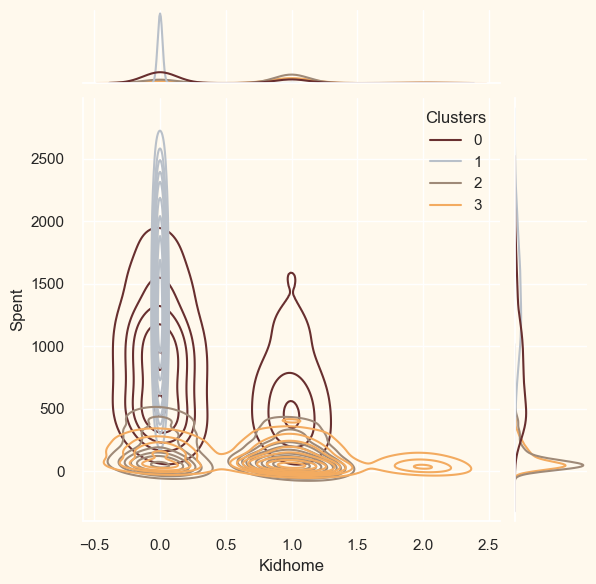

<Figure size 800x550 with 0 Axes>

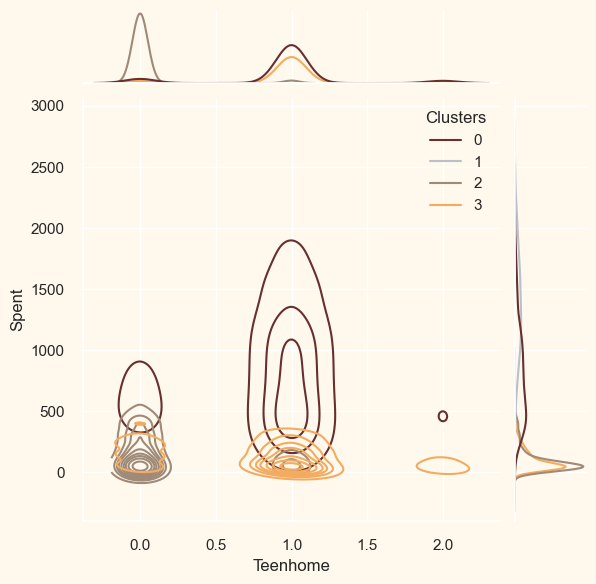

<Figure size 800x550 with 0 Axes>

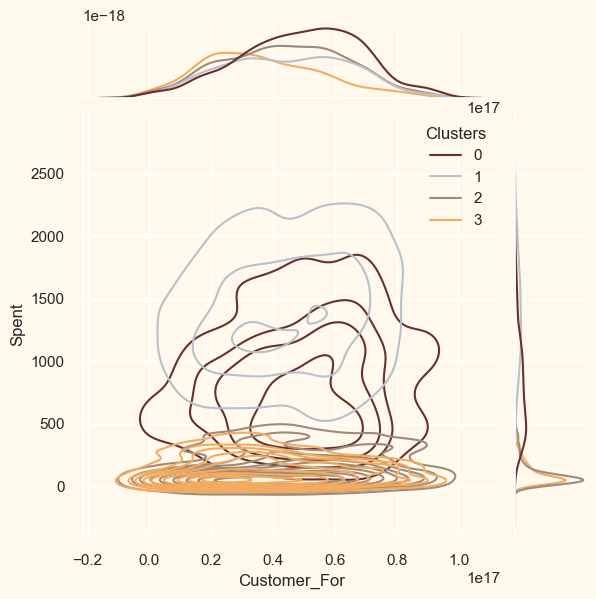

<Figure size 800x550 with 0 Axes>

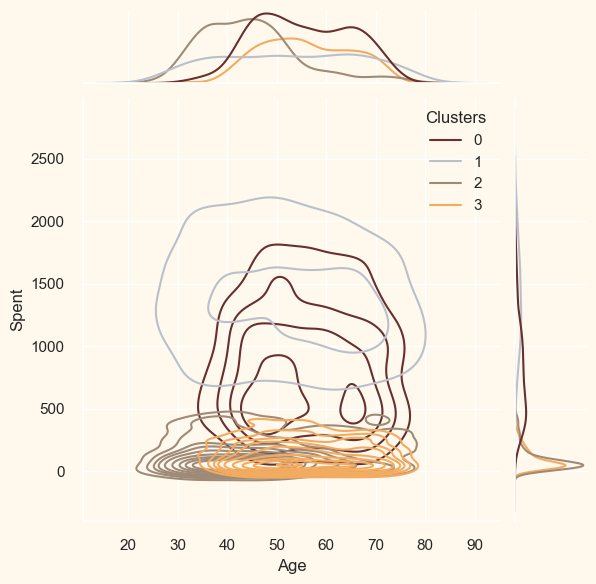

<Figure size 800x550 with 0 Axes>

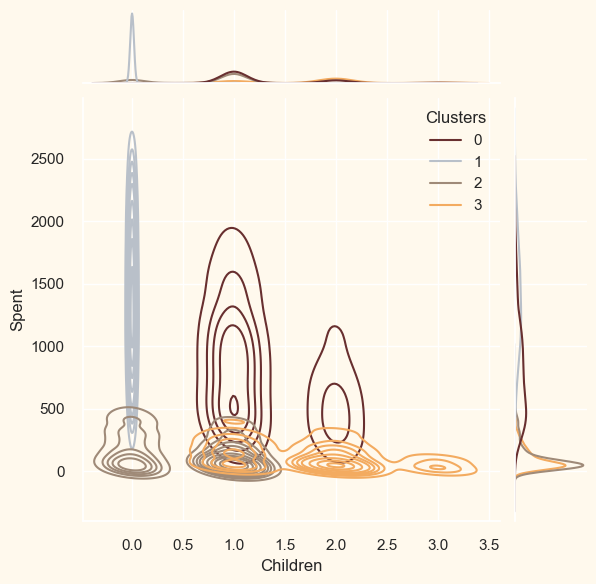

<Figure size 800x550 with 0 Axes>

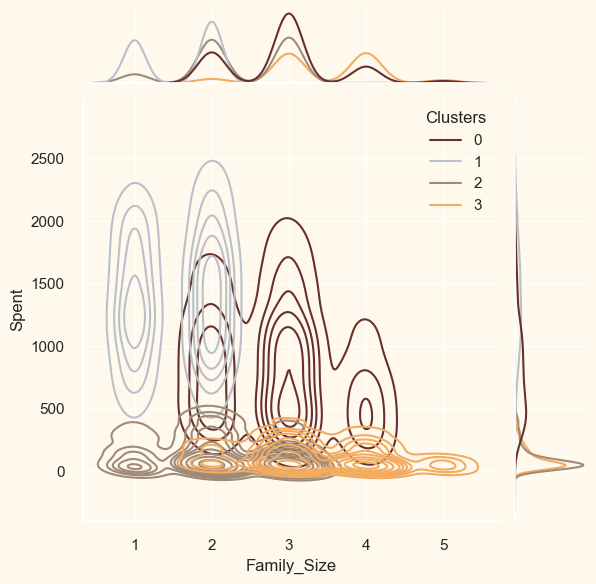

<Figure size 800x550 with 0 Axes>

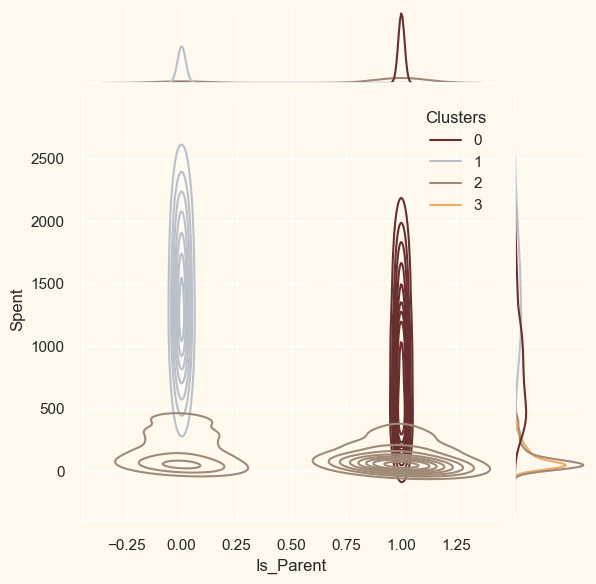

<Figure size 800x550 with 0 Axes>

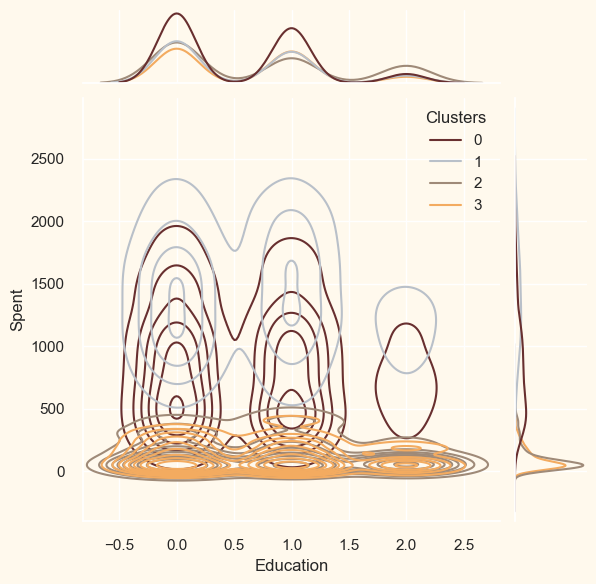

<Figure size 800x550 with 0 Axes>

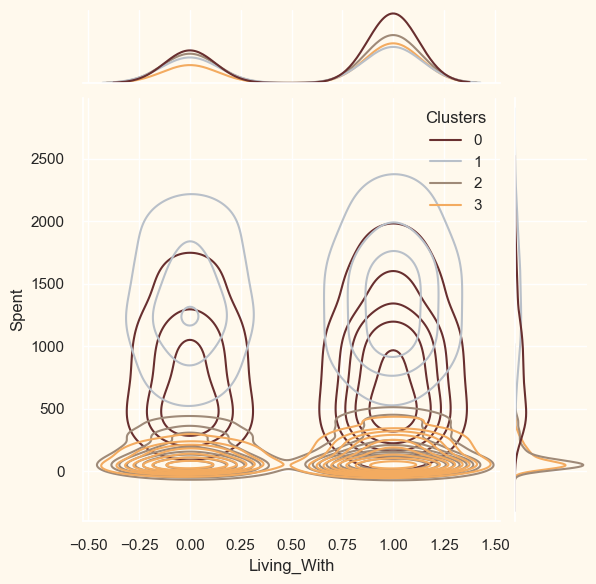

In [30]:
Personal = ["Kidhome", "Teenhome", "Customer_For", "Age", "Children", "Family_Size", "Is_Parent", "Education", "Living_With"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=data[i], y=data['Spent'],hue=data['Clusters'], kind="kde", palette=pal)
    plt.show()

### Points to be Noted

**The following information can be deduced about the customers in different clusters**

**Cluster 0:**
+ Are definitely a parent
+ At the max, have four members in the family, or at least two
+ Single parents are a subset of this group
+ Most have a teenager at home
+ Relatively older

**Clsuter 1:**
+ Are definitely not a parent
+ At the max, are only two members in the family
+ A slight majority of couples over single people
+ Span all Ages
+ A high income group

**Cluster 2:**
+ The majority of these people are parents
+ At the max are 3 members in the family
+ They majorly have one kid (and not teenagers, typically)
+ Relatively younger

**Clsuter 3:**
+ They are definitely a parent
+ At the max are 5 members in the family and at least 2
+ Majority of them have a teenager at home
+ A lower-income group

## Conclusion

In this project, I performed unsupervised clustering. I did use dimensionality reduction followed by agglomerative clsutering.

I came up with 4 clusters and further used them in profiling customers in clusters according to their family structures and income/spending.

This can be used in planning better markeing strategies.

## END